<a href="https://colab.research.google.com/github/hacksJuanDavid/PokemonsClusterAndClassification/blob/main/PokemonsClusterAndClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libries for the Pokemons Clustering and Classficiation**




In [1108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, roc_curve, auc, confusion_matrix,  ConfusionMatrixDisplay

# **Read data from pokedex csv**


In [1151]:
# prompt: Load data from podel data_pokemons and chargue csv file with data include in dataframe

# Load the CSV file into a DataFrame
df = pd.read_csv('data_pokemons/pokedex.csv')  # Replace 'pokemon_data.csv' with the actual file name

# Print the DataFrame
df

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,NaN,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,images/1211.png,1023,Iron Crown,Steel,Psychic,590,90,72,100,122,108,98
1211,images/1212.png,1024,Terapagos Normal Form,Normal,NaN,450,90,65,85,65,85,60
1212,images/1213.png,1024,Terapagos Terastal Form,Normal,NaN,600,95,95,110,105,110,85
1213,images/1214.png,1024,Terapagos Stellar Form,Normal,NaN,700,160,105,110,130,110,85


# **Information in dataset**

In [1110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image     1215 non-null   object
 1   Index     1215 non-null   int64 
 2   Name      1215 non-null   object
 3   Type 1    1215 non-null   object
 4   Type 2    669 non-null    object
 5   Total     1215 non-null   int64 
 6   HP        1215 non-null   int64 
 7   Attack    1215 non-null   int64 
 8   Defense   1215 non-null   int64 
 9   SP. Atk.  1215 non-null   int64 
 10  SP. Def   1215 non-null   int64 
 11  Speed     1215 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 114.0+ KB


# **Remove nulls in dataset is optional apply**

In [1011]:
# Remove rows with null values in any column
df = df.dropna()

# Dataframe
df

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
6,images/7.png,6,Charizard,Fire,Flying,534,78,84,78,109,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...
1207,images/1208.png,1020,Gouging Fire,Fire,Dragon,590,105,115,121,65,93,91
1208,images/1209.png,1021,Raging Bolt,Electric,Dragon,590,125,73,91,137,89,75
1209,images/1210.png,1022,Iron Boulder,Rock,Psychic,590,90,120,80,68,108,124
1210,images/1211.png,1023,Iron Crown,Steel,Psychic,590,90,72,100,122,108,98


# **Search class pokemons**

In [1152]:
# Search types pokemons in dataset
if 'Type 1' in df.columns and 'Type 2' in df.columns:
    unique_type_1 = df['Type 1'].unique()
    unique_type_2 = df['Type 2'].unique()

    print("Unique 'Type 1':", unique_type_1)
    print("Unique 'Type 2':", unique_type_2)

    total_unique_types = set(unique_type_1).union(set(unique_type_2))
    print("Count types pokemons:", len(total_unique_types))
    print("Unique types pokemons:", total_unique_types)

Unique 'Type 1': ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison' 'Electric' 'Ground'
 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Dragon'
 'Flying']
Unique 'Type 2': ['Poison' nan 'Flying' 'Dragon' 'Normal' 'Psychic' 'Steel' 'Ground'
 'Fairy' 'Grass' 'Rock' 'Fighting' 'Electric' 'Ice' 'Dark' 'Ghost' 'Fire'
 'Water' 'Bug']
Count types pokemons: 19
Unique types pokemons: {'Ground', 'Ice', 'Psychic', 'Bug', 'Rock', 'Grass', 'Poison', 'Flying', 'Electric', nan, 'Water', 'Steel', 'Normal', 'Fighting', 'Fire', 'Dragon', 'Ghost', 'Fairy', 'Dark'}


# **Replace string class with numeric class**

In [1153]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Type 1' column
df.loc[:, 'Type 1'] = label_encoder.fit_transform(df['Type 1'].astype(str))

# Fit and transform the 'Type 2' column
df.loc[:, 'Type 2'] = label_encoder.fit_transform(df['Type 2'].astype(str))

# Print the DataFrame with converted columns
df

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,9,13,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,9,13,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,9,13,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,9,13,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,6,18,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,images/1211.png,1023,Iron Crown,16,14,590,90,72,100,122,108,98
1211,images/1212.png,1024,Terapagos Normal Form,12,18,450,90,65,85,65,85,60
1212,images/1213.png,1024,Terapagos Terastal Form,12,18,600,95,95,110,105,110,85
1213,images/1214.png,1024,Terapagos Stellar Form,12,18,700,160,105,110,130,110,85


# **Information columns names**

In [1154]:
df.columns

Index(['Image', 'Index', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'SP. Atk.', 'SP. Def', 'Speed'],
      dtype='object')

# **Apply method Elbow for search optimal "K"**

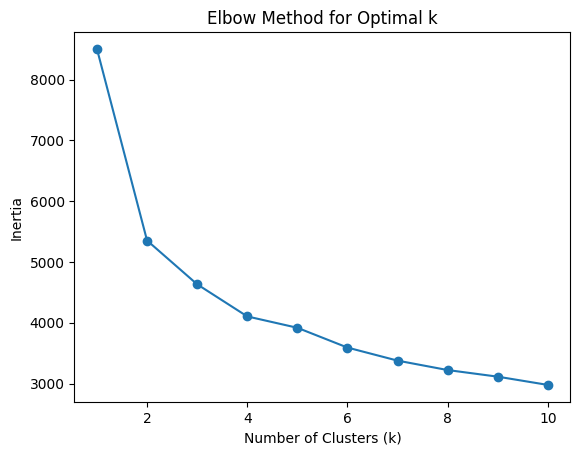

In [1155]:
# Select the features for clustering
X = df[['Total','HP','Attack','Defense','SP. Atk.','SP. Def','Speed']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the inertia for different values of k
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

## **Analsis de metodo del codo**

En base a las diferentes variables que asignadas en el cluster, el metodo del codo indica que la cantidad enfectiva para los clusters es de 2, por lo tanto indica que entre mas clusters alla optimizacion de ellos es mas variante.

# **Apply clustering using Kmeans**

In [1156]:
# Select the features for clustering
X = df[['Total','HP','Attack','Defense','SP. Atk.','SP. Def','Speed']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Add column
df.loc[:, 'PredictionCluster'] = pd.Series(kmeans.fit_predict(X_scaled), index=df.index)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.32385553593372723


# **Analsis de los Resultados de Silhouette Score en Clustering**

El **Silhouette Score** es una métrica utilizada para evaluar la calidad de los clústeres creados en un algoritmo de clustering. Mide qué tan bien cada punto está asignado a su clúster, comparando su cohesión (distancia dentro del mismo clúster) y su separación (distancia con otros clústeres). El valor del Silhouette Score varía entre -1 y 1, y se interpreta de la siguiente manera:

## **Fórmula**

Para cada punto `i`, el Silhouette Score se calcula como:

    S(i) = (b(i) - a(i)) / max(a(i), b(i))

Donde:
- `a(i)`: es la distancia promedio de `i` a los otros puntos dentro de su mismo clúster.
- `b(i)`: es la distancia promedio de `i` al clúster más cercano al que no pertenece.

## **Interpretación**

- **1**: El punto está bien agrupado y muy lejos de otros clústeres, lo que indica una muy buena asignación.
- **0**: El punto está en el borde de dos clústeres, lo que sugiere que está en una zona ambigua entre dos agrupaciones.
- **-1**: El punto puede estar mal asignado al clúster equivocado, ya que está más cerca de un clúster diferente que del propio.

## **Ejemplos**

- **Silhouette Score cercano a 1**: Significa que los clústeres están bien definidos y los puntos están correctamente asignados.
- **Silhouette Score cercano a 0**: Indica que los clústeres se solapan, y los puntos están en los límites de los clústeres.
- **Silhouette Score negativo**: Significa que los puntos están asignados al clúster incorrecto.

## **Promedio del Silhouette Score**

Al calcular el promedio del Silhouette Score para todos los puntos, puedes obtener una visión general de la calidad del clustering:

- **Silhouette promedio > 0.5**: Clustering razonablemente bueno.
- **Silhouette promedio entre 0.3 y 0.5**: Indica que el clustering es adecuado, pero podría mejorarse.
- **Silhouette promedio < 0.3**: El clustering es de baja calidad y sugiere que tal vez el número de clústeres o el método de clustering no son adecuados.

Esta métrica es útil para elegir el número de clústeres correcto, comparando los valores promedio del Silhouette Score para diferentes números de clústeres y seleccionando aquel que maximice el score.

## **Análisis del Silhouette Score de 0.32**

Un Silhouette Score de 0.32 es considerado moderado. Indica que, si bien hay cierta separación entre los clústeres, no es lo suficientemente clara o definida.
Esto sugiere que los puntos dentro de cada clúster están relativamente más cerca de otros puntos de su grupo que de otros grupos, pero todavía hay superposiciones o confusiones.


# **Draw clustering relation with Attack and Defense**

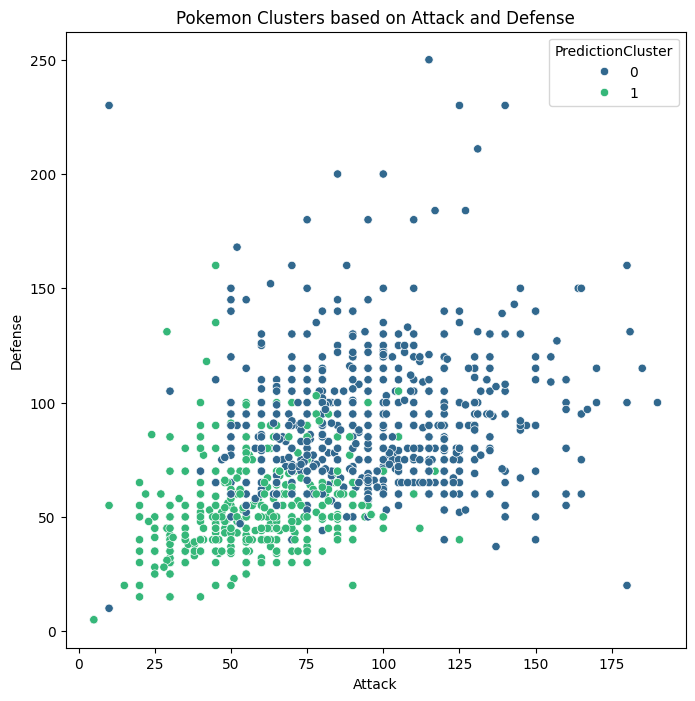

In [1116]:
# Visualize the clusters using a scatter plot
# For example Attack and Defense
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Attack', y='Defense', hue='PredictionCluster', data=df, palette='viridis')
plt.title('Pokemon Clusters based on Attack and Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

# **Draw clustering relation with HP and Speed**

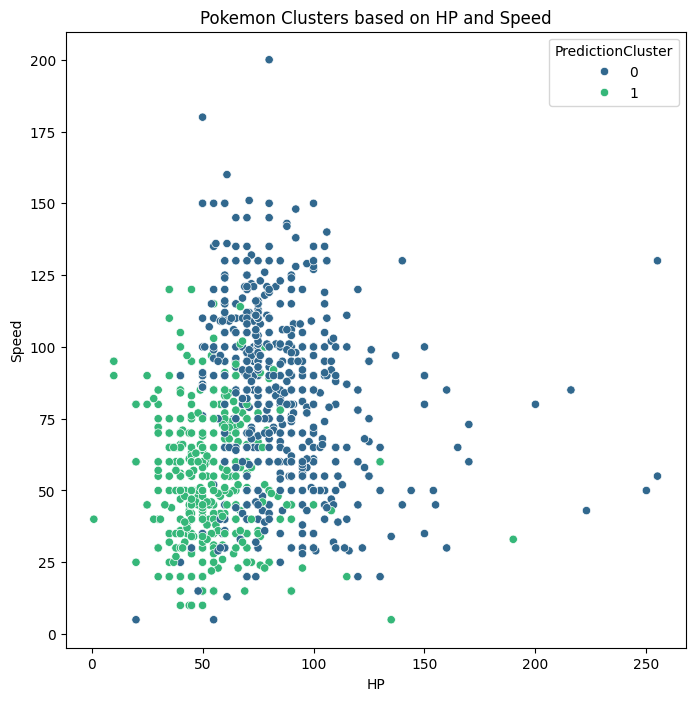

In [1117]:
# You can also visualize clusters based on other features
# For example, 'HP' and 'Speed'
plt.figure(figsize=(8, 8))
sns.scatterplot(x='HP', y='Speed', hue='PredictionCluster', data=df, palette='viridis')
plt.title('Pokemon Clusters based on HP and Speed')
plt.xlabel('HP')
plt.ylabel('Speed')
plt.show()

# **Draw 3D clustering relation with HP, Attack, Speed**

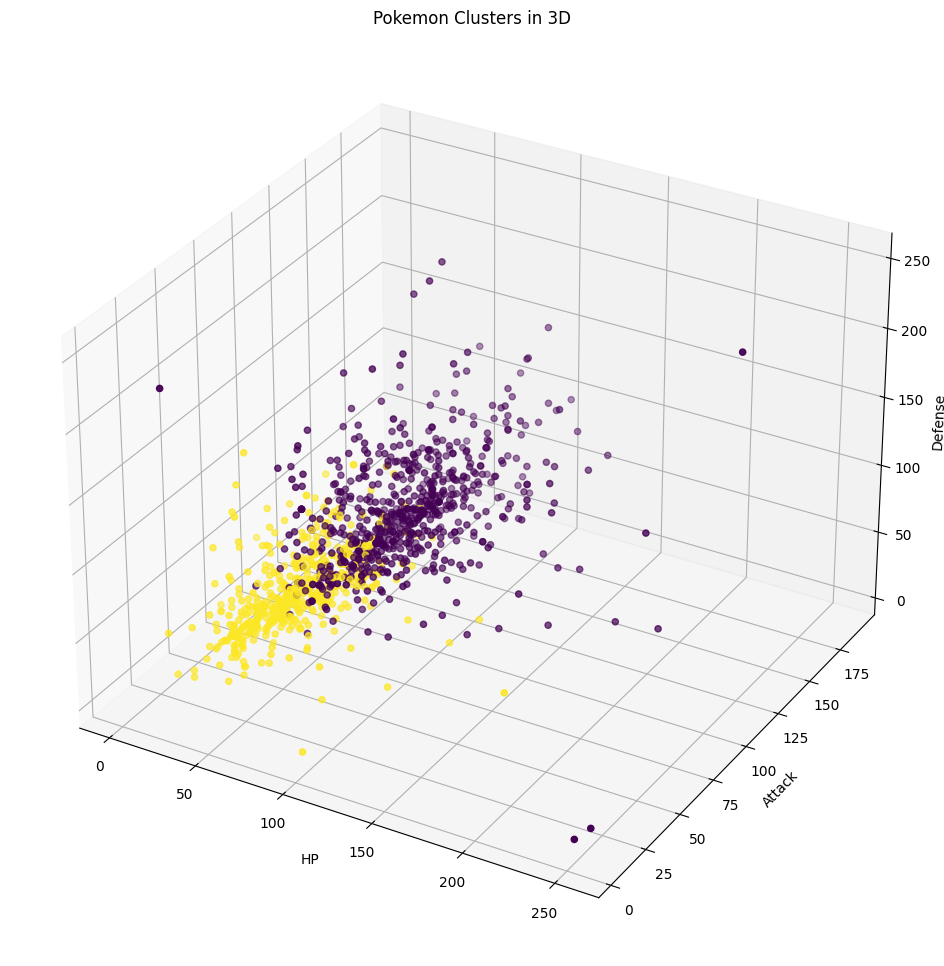

In [1118]:
# 3D Scatter Plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['HP'], df['Attack'], df['Defense'], c=df['PredictionCluster'], cmap='viridis')
ax.set_xlabel('HP')
ax.set_ylabel('Attack')
ax.set_zlabel('Defense')
plt.title('Pokemon Clusters in 3D')
plt.show()

# **Create histogram frecuency for view data in moved in dataset**

array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'HP'}>],
       [<Axes: title={'center': 'Attack'}>,
        <Axes: title={'center': 'Defense'}>,
        <Axes: title={'center': 'SP. Atk.'}>],
       [<Axes: title={'center': 'SP. Def'}>,
        <Axes: title={'center': 'Speed'}>,
        <Axes: title={'center': 'PredictionCluster'}>]], dtype=object)

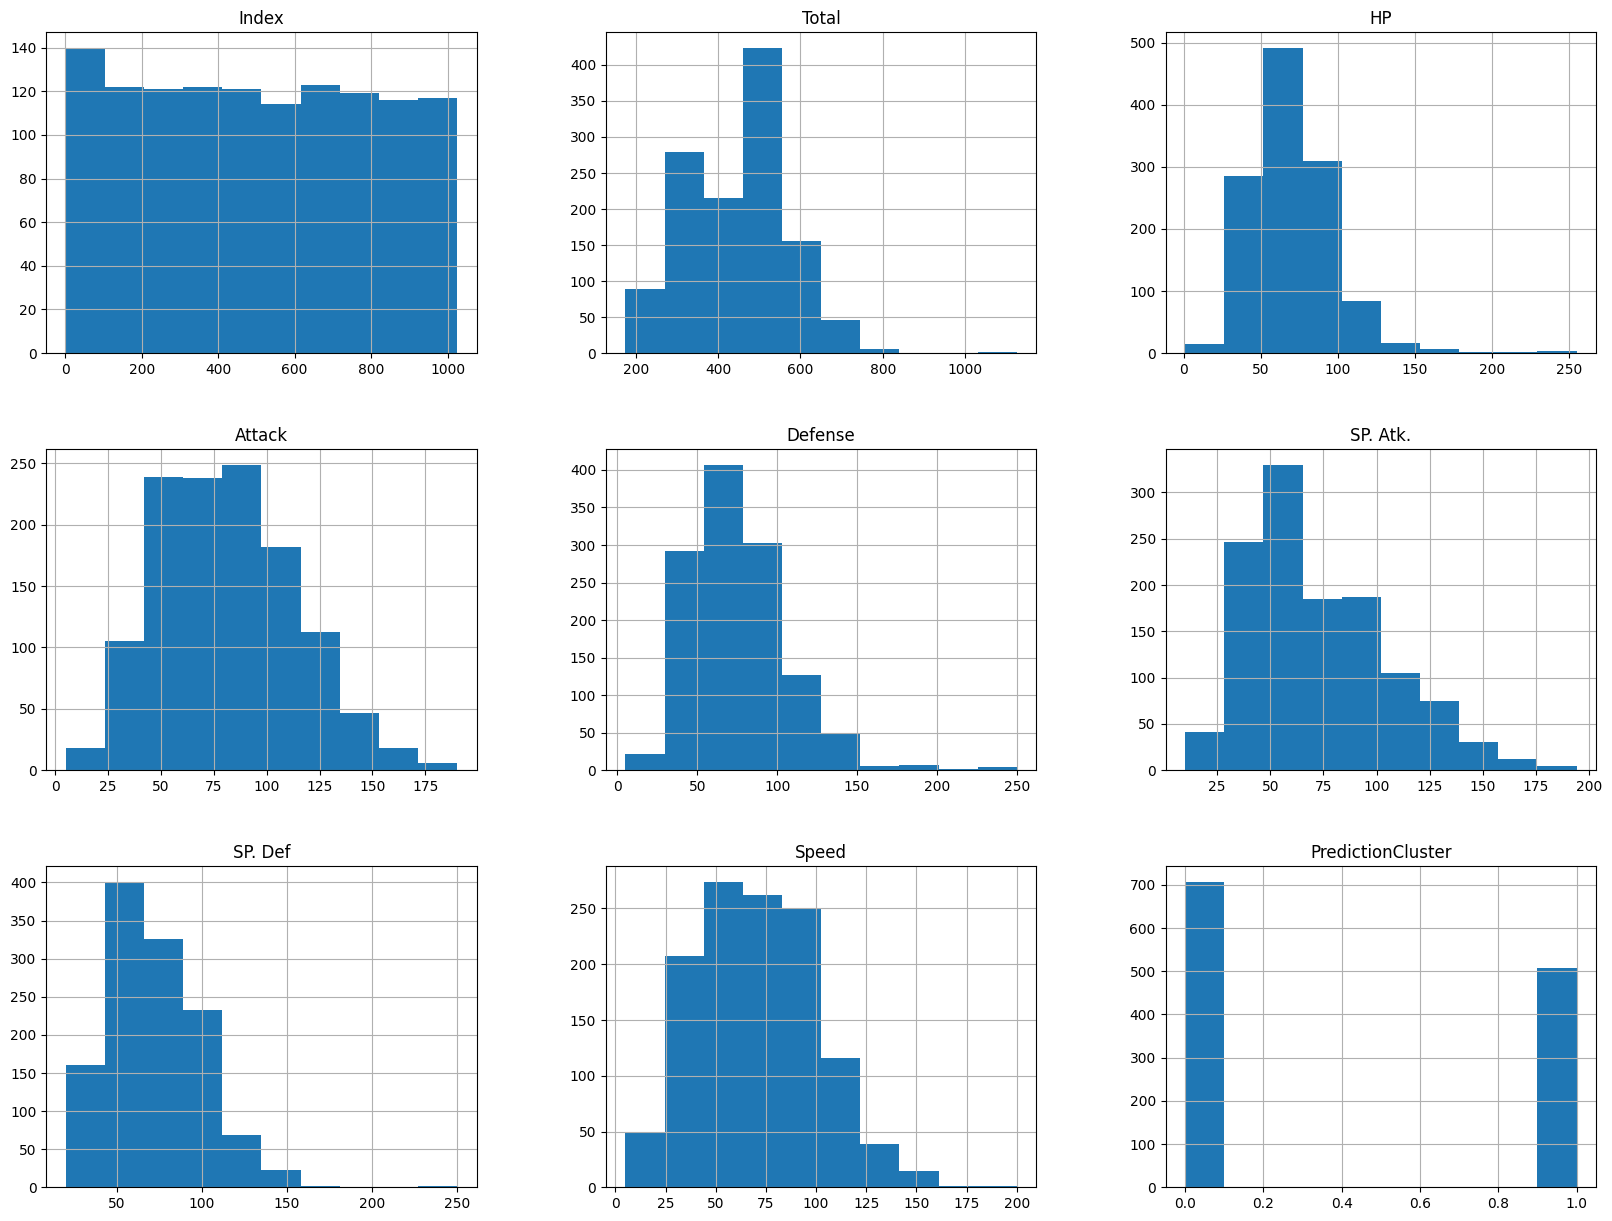

In [1024]:
# Create histogram frecuency for view data moved in set
df.hist(figsize=(20,15))

# **Count the number of occurrences in clases for column PredictionCluster**

In [1157]:
# Count the number of occurrences of each class in the 'PredictionCluster' column
class_counts = df['PredictionCluster'].value_counts()

# Print the results
print("Number of Pokemons in each cluster:")
print(class_counts)

Number of Pokemons in each cluster:
PredictionCluster
0    707
1    508
Name: count, dtype: int64


## **Analisis de balance de clases**
En el conteo de clases se nota un poco de desbalance entre ellas, pero eso no quiere decir que totalmente sean desproporcionales para que se haya sesgo, lo que se interpreta aqui es que puede que el modelo aprenda mas rapido una clase que la otra y la interprete mejor, dando asi buenos resultados en los scores esperados.

# **Select features vars and objetive class**

In [1158]:
# Select vars
features = [
  'Total',
  'HP',
  'Attack',
  'Defense',
  'SP. Atk.',
  'SP. Def',
  'Speed'
]

# Fetures for train
X = df[features]
# Objective
y = df['PredictionCluster']

# **Division data in train and test**

In [1174]:
# Partial data for train model 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Train model using Gradient Boosting Classifier**

In [1175]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=50,
    max_depth=14,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    )

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# **Scores for the model using classification report**

In [1176]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9917808219178083
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       217
           1       0.99      0.99      0.99       148

    accuracy                           0.99       365
   macro avg       0.99      0.99      0.99       365
weighted avg       0.99      0.99      0.99       365



## **Análisis de Resultados del Modelo**

Los resultados obtenidos del modelo muestran un alto rendimiento general, con una **exactitud (accuracy)** de **0.9918**, lo que indica que el modelo ha clasificado correctamente aproximadamente el 99.18% de las instancias en el conjunto de datos, como siguiente detallare las metricas de evaluacion en cada clase:

### **Métricas por Clase**

- **Clase 0:**
  - **Precisión (Precision):** 1.00
    - Esto significa que todas las instancias clasificadas como clase 0 son realmente clase 0, indicando un desempeño perfecto en esta clase.
  - **Recuperación (Recall):** 0.99
    - De las instancias reales de clase 0, el 99% fueron correctamente identificadas por el modelo.
  - **F1-Score:** 0.99
    - El F1-Score, que es la media armónica de precisión y recuperación, refleja un excelente balance entre estas dos métricas.

- **Clase 1:**
  - **Precisión (Precision):** 0.99
    - Casi todas las instancias clasificadas como clase 1 son correctas, con un pequeño margen de error.
  - **Recuperación (Recall):** 0.99
    - El modelo identificó correctamente el 99% de las instancias de la clase 1, lo que sugiere que no está perdiendo muchas instancias relevantes.
  - **F1-Score:** 0.99
    - Nuevamente, el F1-Score muestra un excelente desempeño en esta clase, indicando que el modelo tiene un buen balance entre precisión y recuperación.

### **Promedios de Métricas**

- **Promedio Macro:**
  - Las métricas macro (promedio simple) para precisión, recuperación y F1-Score son todas **0.99**, lo que resalta que el modelo tiene un rendimiento equilibrado entre las diferentes clases.

- **Promedio Ponderado:**
  - Las métricas ponderadas también presentan un valor de **0.99** en precisión, recuperación y F1-Score, lo que confirma que el modelo se desempeña consistentemente, teniendo en cuenta el soporte (cantidad de instancias) de cada clase.

### **Conclusiones**

El análisis de las métricas revela que el modelo es altamente efectivo y robusto. La precisión y la recuperación son realmente altas en ambas clases, indicando que el modelo no solo tiene un buen rendimiento general, sino que también maneja bien las clases individuales. Dada la alta efectividad y los valores de F1-Score, se puede concluir que el modelo es adecuado para su implementación en situaciones del mundo real.



# **Scores for the model using cross validation**

In [1164]:
# Perform cross-validation
cv_scores = cross_val_score(gb_classifier, X, y, cv=5)  # You can change the number of folds (cv)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.99588477 0.99176955 0.99588477 0.98353909 0.99588477]
Average Cross-Validation Score: 0.9925925925925926


## **Analisis de la validacion cruzada**

Con base en los resultados de cross-validation, se entiende que el modelo no está sobreajustado. Las puntuaciones obtenidas en las diferentes particiones del conjunto de datos son muy consistentes, con valores que oscilan entre 0.9835 y 0.9958. El promedio de la validación cruzada es 0.9926, lo que refleja un alto rendimiento en todas las pruebas.

## **Algunas observaciones clave**:

- **Consistencia en las puntuaciones:** Los resultados de cross-validation son muy cercanos entre sí, lo que sugiere que el modelo generaliza bien a diferentes subconjuntos de datos.
- **AUC y cross-validation alineados:** El AUC alto en la curva ROC coincide con las puntuaciones de cross-validation, lo que indica que no solo el rendimiento en el conjunto de entrenamiento es bueno, sino que también el modelo se comporta de manera consistente en diferentes particiones de los datos.


# **Validation scores using matrix of confution for correct and erros in classification model**

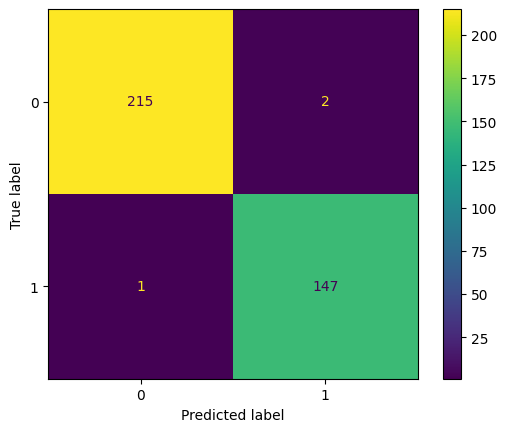

Confusion Matrix:
[[215   2]
 [  1 147]]


In [1092]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

# Show results de matrix in print
print("Confusion Matrix:")
print(cm)

## **Análisis de la Matriz de Confusión**

La matriz de confusión es una herramienta fundamental para evaluar el rendimiento de un modelo de clasificación. A continuación, se presenta el análisis de la matriz de confusión proporcionada:

### **Interpretación de la Matriz**

La matriz se interpreta de la siguiente manera:

- **Verdaderos Positivos (TP):** 147 (predicciones correctas de la clase 1)
- **Verdaderos Negativos (TN):** 215 (predicciones correctas de la clase 0)
- **Falsos Positivos (FP):** 2 (predicciones incorrectas de la clase 1, cuando realmente son clase 0)
- **Falsos Negativos (FN):** 1 (predicciones incorrectas de la clase 0, cuando realmente son clase 1)

### **Conclusiones**

Los resultados de la matriz de confusión reflejan un modelo altamente efectivo:

- La **precisión** del modelo es **0.986**, lo que significa que el 98.6% de las predicciones positivas son correctas.
- La **recuperación** es **0.993**, indicando que el modelo identifica correctamente el 99.3% de las instancias de la clase 1.
- El **F1-Score** de aproximadamente **0.989** muestra un excelente balance entre precisión y recuperación, lo que sugiere que el modelo está bien ajustado para manejar ambas clases.
- La **exactitud** de **0.991** indica que el modelo clasifica correctamente el 99.1% de las instancias, lo que es un resultado excepcional.


# Search best classification report using StatifieldKfold

In [1102]:
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gb_classifier.fit(X_train, y_train)
    y_pred = gb_classifier.predict(X_test)
    # Puedes calcular las métricas aquí
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       141
           1       0.99      1.00      1.00       102

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weighted avg       1.00      1.00      1.00       243

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       141
           1       0.98      1.00      0.99       102

    accuracy                           0.99       243
   macro avg       0.99      0.99      0.99       243
weighted avg       0.99      0.99      0.99       243

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       141
           1       1.00      0.99      1.00       102

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weigh

# Evalution model using Curve ROC for the search good model

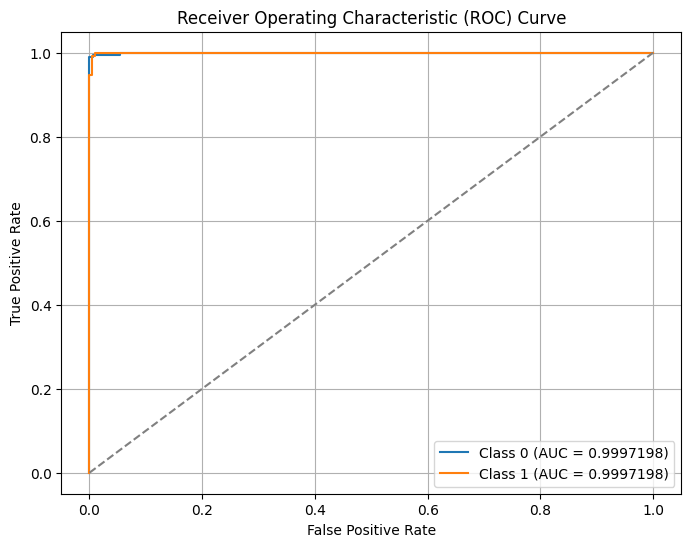

In [1173]:
# Get the probabilities of prediction in model for class
y_probs = gb_classifier.predict_proba(X_test)

# Calculate of curve ROC and the AUC for of class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_probs[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate of curve ROC and the AUC for of class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_probs[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Draw curves ROC
plt.figure(figsize=(8, 6))

# Curva ROC for of class 0
plt.plot(fpr_0, tpr_0, label=f'Class 0 (AUC = {roc_auc_0:.7f})')

# Curve ROC for of class 1
plt.plot(fpr_1, tpr_1, label=f'Class 1 (AUC = {roc_auc_1:.7f})')

# Line of reference (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# View plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


## **Analisis de la curva ROC**
La curva ROC que se muestra indica un excelente desempeño del modelo, ya que las dos clases (Clase 0 y Clase 1) tienen un AUC (Área bajo la curva) de 0.9997, lo que es casi perfecto. Esto significa que el modelo tiene una alta capacidad para distinguir entre las clases positivas y negativas, con muy pocos errores.

## **Aquí algunos puntos clave**:

- La curva está muy cercana al vértice superior izquierdo del gráfico, lo que indica una alta tasa de verdaderos positivos (TPR) y una baja tasa de falsos positivos (FPR).
- Un AUC cercano a 1 sugiere que el modelo puede distinguir correctamente entre las clases con muy alta precisión.
- En este caso, parece que el modelo tiene un rendimiento efectivamente bueno, lo que puede ser el resultado de un dataset muy bien equilibrado o un modelo que está sobreajustado (lo cual sería importante verificar con validaciones cruzadas o pruebas en otros conjuntos de datos).
- La curva no se ve muy suave por el hecho de tener tan pocos datos

## **En base a los resultados de la validacion cruzada**
Con base en los resultados de cross-validation, parece que el modelo no está sobreajustado. Las puntuaciones obtenidas en las diferentes particiones del conjunto de datos son muy consistentes, con valores que oscilan entre 0.9835 y 0.9958. El promedio de la validación cruzada es 0.9926, lo que refleja un alto rendimiento en todas las pruebas.

# Test cluster using model in case 1

In [1043]:
# Create a new data point for prediction, ensuring column names match the training data
new_data_point = pd.DataFrame({
    'Total': [500],
    'HP': [100],
    'Attack': [100],
    'Defense': [100],
    'SP. Atk.': [100],
    'SP. Def': [100],
    'Speed': [100]
})

# Predict the cluster for the new data point
predicted_cluster = gb_classifier.predict(new_data_point)

# Print the predicted cluster
print(f"Predicted Cluster for the new data point: {predicted_cluster[0]}")

Predicted Cluster for the new data point: 0


# Test cluster using model in case 2

In [1044]:
# Create a new data point for prediction
new_data_point = pd.DataFrame({
    'Total': [333],
    'HP': [55],
    'Attack': [72],
    'Defense': [30],
    'SP. Atk.': [16],
    'SP. Def': [87],
    'Speed': [44]
})

# Predict the cluster for the new data point
predicted_cluster = gb_classifier.predict(new_data_point)

# Print the predicted cluster
print(f"Predicted Cluster for the new data point: {predicted_cluster[0]}")

Predicted Cluster for the new data point: 1
